## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems

In [1]:
%matplotlib inline 

from imports import *

print('cuda' if torch.cuda.is_available() else 'cpu')

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
cuda


# Figures 1 + 2: Compare Image Fidelity for Different Algorithms and Compare PSNR over time using NLM

In [2]:
MASK = generate_mask()
res = create_problem(img_path='./data/Set12/13.jpg', sigma=1.0, mask_=MASK)
denoise_parameters = nlm_config()

In [60]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'nlm', denoise_parameters, 800, 2, 20, 1000, True)

0 0 12.641901581382708
0 1 12.752829200183344
0 2 12.863059089319817
0 3 12.969760036960858
0 4 13.072242417117225
0 5 13.168462978500253
0 6 13.262327494223163
0 7 13.353437843846109
0 8 13.437953461050222
0 9 13.516690185709955
0 10 13.51719196491083
0 11 13.597157908300403
0 12 13.66354114720637
0 13 13.735310039322776
0 14 13.80865975971313
0 15 13.877077261872756
0 16 13.933930781799496
0 17 13.998130686707634
0 18 14.066566419065051
0 19 14.129749825785517
1 0 14.183460120212516
1 1 14.236545732788793
1 2 14.288470116438326
1 3 14.339557764212662
1 4 14.391365840880697
1 5 14.442760505102505
1 6 14.493834431646341
1 7 14.502575975588988
1 8 14.55282389029013
1 9 14.602409871116821
1 10 14.654217010374303
1 11 14.703487199307524
1 12 14.750648626740766
1 13 14.731021679880058
1 14 14.766195345370159
1 15 14.769672123515925
1 16 14.816655548086601
1 17 14.866603376957354
1 18 14.911783475573122
1 19 14.954006343849615


In [61]:
z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(res, 'nlm', denoise_parameters, 0.8, 100, False)

In [62]:
z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(res, 'nlm', denoise_parameters, 0.8, 100, 10000, False)

In [63]:
z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(res, 'nlm', denoise_parameters, 0.095, 10, 10000, 0.1, False)

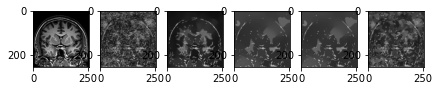

In [66]:
show_multiple([torch.Tensor(res['original']), torch.Tensor(res['noisy']), torch.Tensor(z_SVRG), torch.Tensor(z_GD), torch.Tensor(z_SGD), torch.Tensor(z_LSVRG)])

## Figure 3: Compare Image Denoising Routines with PnP-SVRG

In [ ]:
MASK = generate_mask()
res = create_problem(img_path='./data/Set12/13.jpg', sigma=1.0, mask_=MASK)
denoise_parameters = nlm_config()

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'nlm', denoise_parameters, 0.095, 10, 10, 10000, True)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'cnn', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'bm3d', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'tv', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
show_multiple(res['original'])

## Figure 4: Compare Sampling Ratio for each PnP Algorithm

In [ ]:
num_probs = 100
num_trials = 10
sample_probs = np.linspace(0.2, 1, num_probs)

prob_vs_psnr_SVRG = []
prob_vs_psnr_GD = []
prob_vs_psnr_SGD = []
prob_vs_psnr_LSVRG = []

for i in range(num_probs):
    samp_ratio_SVRG = []
    samp_ratio_GD = []
    samp_ratio_SGD = []
    samp_ratio_LSVRG = []
    for j in range(num_trials):
        MASK = generate_mask(height=256, width=256, sample_prob=sample_probs[i])
        res = create_problem(img_path='./data/Set12/13.jpg', sigma=1.0, mask_=MASK)
        denoise_parameters = nlm_config()

        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'nlm', denoise_parameters, 0.095, 10, 10, 10000, False)
        samp_ratio_SVRG.append(psnr_SVRG[-1])

        z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(res, 'nlm', denoise_parameters, 0.8, 100, False)
        samp_ratio_GD.append(psnr_GD[-1])

        z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(res, 'nlm', denoise_parameters, 0.8, 100, 10000, False)
        samp_ratio_SGD.append(psnr_SGD[-1])

        z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(res, 'nlm', denoise_parameters, 0.095, 10, 10000, 0.1, False)
        samp_ratio_LSVRG.append(psnr_LSVRG[-1])
    prob_vs_psnr_SVRG.append(np.average(samp_ratio_SVRG))
    prob_vs_psnr_GD.append(np.average(samp_ratio_GD))
    prob_vs_psnr_SGD.append(np.average(samp_ratio_SGD))
    prob_vs_psnr_LSVRG.append(np.average(samp_ratio_LSVRG))
# PLOT CURVES